In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 0. Загрузка, предобработка и визуализация обучающих и тестовых данных

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [6]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
print( y_train.shape, y_test.shape)

(50000, 1) (10000, 1)


In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train / 255.0
X_test = X_test / 255.0

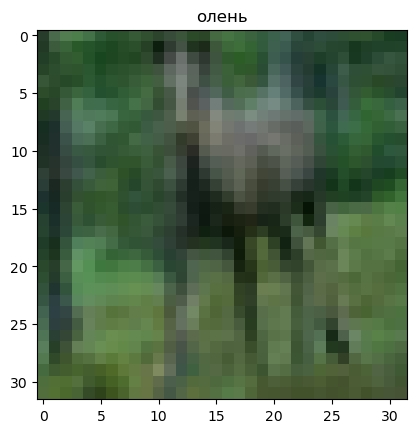

In [18]:
N = np.random.randint(0, X_test.shape[0] + 1)

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

# 1. Базовое решение

In [34]:
num_classes = len(classes)
num_epochs = 5
batch_size = 128

In [71]:
base_model = Sequential()

base_model.add(Conv2D(6, kernel_size=(8, 8), padding='same', activation='relu', input_shape=X_train.shape[1:]))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Conv2D(12, kernel_size=(3, 3), padding='same', activation='relu'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Flatten())
base_model.add(Dense(512, activation='relu'))
base_model.add(Dense(num_classes, activation='softmax'))

base_model.summary()

base_model.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 6)         1158      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 12)        660       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 12)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 768)               0         
                                                                 
 dense_12 (Dense)            (None, 512)              

In [72]:
history = base_model.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

Epoch 1/5
391/391 [==============================] - 63s 160ms/step - loss: 1.6343 - accuracy: 0.4136 - val_loss: 1.4393 - val_accuracy: 0.4839
Epoch 2/5
391/391 [==============================] - 60s 154ms/step - loss: 1.3727 - accuracy: 0.5119 - val_loss: 1.3137 - val_accuracy: 0.5302
Epoch 3/5
391/391 [==============================] - 57s 146ms/step - loss: 1.2577 - accuracy: 0.5553 - val_loss: 1.2468 - val_accuracy: 0.5518
Epoch 4/5
391/391 [==============================] - 55s 141ms/step - loss: 1.1636 - accuracy: 0.5905 - val_loss: 1.1928 - val_accuracy: 0.5736
Epoch 5/5
391/391 [==============================] - 52s 133ms/step - loss: 1.0806 - accuracy: 0.6213 - val_loss: 1.1398 - val_accuracy: 0.5963


In [74]:
loss, metric = base_model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.1398 - accuracy: 0.5963


In [75]:
stata = pd.DataFrame(columns=['Название модели',
                              'Кол-во сверточных слоев',
                              'Кол-во фильтров',
                              'Accuracy test'
                              ])

In [76]:
stata = stata.append({'Название модели': 'Базовое решение',
                     'Кол-во сверточных слоев': 2,
                     'Кол-во фильтров': 12 + 6,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.5963


In [77]:
y_pred = base_model.predict(X_test)

313/313 [==============================] - 5s 16ms/step


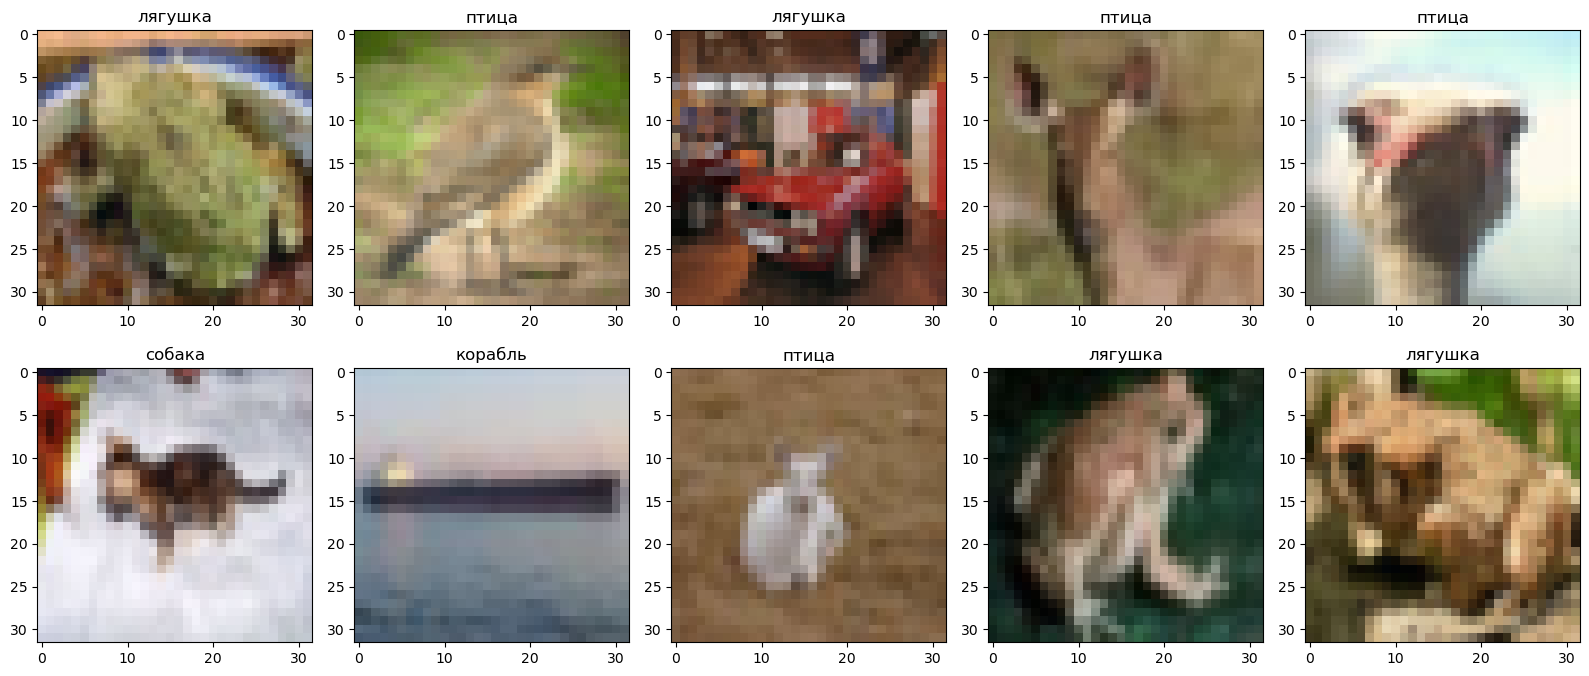

In [78]:
NN = np.random.randint(0, X_test.shape[0] + 1, num_classes)

plt.figure(figsize=(16,7))

for i, nn in enumerate(NN):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[nn])
    plt.title(classes[np.argmax(y_pred[nn,:])])
    plt.tight_layout();

# 2. Увеличение ширины сети (количества фильтров)

# 2.1 Сеть model_1

In [79]:
model_1 = Sequential()

model_1.add(Conv2D(12, kernel_size=(8, 8), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(24, kernel_size=(3, 3), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(num_classes, activation='softmax'))

model_1.summary()

model_1.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 12)        2316      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 12)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 24)        2616      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 8, 8, 24)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1536)              0         
                                                                 
 dense_16 (Dense)            (None, 512)              

                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 797,006
Trainable params: 797,006
Non-trainable params: 0
_________________________________________________________________


In [80]:
history = model_1.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

loss, metric = model_1.evaluate(X_test, y_test)

Epoch 1/5
391/391 [==============================] - 71s 181ms/step - loss: 1.5299 - accuracy: 0.4541 - val_loss: 1.2743 - val_accuracy: 0.5406
Epoch 2/5
391/391 [==============================] - 73s 186ms/step - loss: 1.2151 - accuracy: 0.5729 - val_loss: 1.1823 - val_accuracy: 0.5879
Epoch 3/5
391/391 [==============================] - 70s 180ms/step - loss: 1.0902 - accuracy: 0.6161 - val_loss: 1.1238 - val_accuracy: 0.6075
Epoch 4/5
391/391 [==============================] - 69s 177ms/step - loss: 0.9805 - accuracy: 0.6552 - val_loss: 1.0607 - val_accuracy: 0.6275
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 1.0076 - accuracy: 0.6493


In [81]:
stata = stata.append({'Название модели': 'Модель №1',
                     'Кол-во сверточных слоев': 2,
                     'Кол-во фильтров': 12 + 24,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.5963
1,Модель №1,2,36,0.6493


# 2.2 Сеть model_2

In [85]:
model_2 = Sequential()

model_2.add(Conv2D(24, kernel_size=(8, 8), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(48, kernel_size=(3, 3), padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.summary()

model_2.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 24)        4632      


                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 48)        10416     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 8, 8, 48)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               1573376   
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total para

In [86]:
history = model_2.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

loss, metric = model_2.evaluate(X_test, y_test)

Epoch 1/5
391/391 [==============================] - 100s 255ms/step - loss: 1.5162 - accuracy: 0.4590 - val_loss: 1.2557 - val_accuracy: 0.5547
Epoch 2/5
391/391 [==============================] - 105s 267ms/step - loss: 1.1766 - accuracy: 0.5864 - val_loss: 1.1268 - val_accuracy: 0.5983
Epoch 3/5
391/391 [==============================] - 104s 266ms/step - loss: 1.0175 - accuracy: 0.6435 - val_loss: 1.0350 - val_accuracy: 0.6344
Epoch 4/5
391/391 [==============================] - 103s 264ms/step - loss: 0.9045 - accuracy: 0.6827 - val_loss: 1.0577 - val_accuracy: 0.6376
Epoch 5/5
313/313 [==============================] - 10s 32ms/step - loss: 0.9941 - accuracy: 0.6585


In [87]:
stata = stata.append({'Название модели': 'Модель №2',
                     'Кол-во сверточных слоев': 2,
                     'Кол-во фильтров': 24 + 48,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.5963
1,Модель №1,2,36,0.6493
2,Модель №2,2,50,0.6456
3,Модель №2,2,72,0.6585


# 3. Увеличение глубины сети (количества слоев)

# 3.1 Сеть model_3

In [90]:
model_3 = Sequential()

model_3.add(Conv2D(4, kernel_size=(8, 8), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(6, kernel_size=(6, 6), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.summary()

model_3.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 4)         772       
                                                                 


 max_pooling2d_25 (MaxPoolin  (None, 16, 16, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 6)         870       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 8, 8, 6)          0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 8)           440       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 4, 4, 8)          0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 128)               0         
                                                                 
 dense_22 

In [91]:
history = model_3.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

loss, metric = model_3.evaluate(X_test, y_test)

Epoch 1/5
391/391 [==============================] - 63s 161ms/step - loss: 1.7912 - accuracy: 0.3519 - val_loss: 1.6002 - val_accuracy: 0.4312
Epoch 2/5
391/391 [==============================] - 63s 162ms/step - loss: 1.5505 - accuracy: 0.4418 - val_loss: 1.5459 - val_accuracy: 0.4567
Epoch 3/5
391/391 [==============================] - 61s 154ms/step - loss: 1.4742 - accuracy: 0.4713 - val_loss: 1.4262 - val_accuracy: 0.4926
Epoch 4/5
391/391 [==============================] - 58s 148ms/step - loss: 1.4123 - accuracy: 0.4954 - val_loss: 1.3949 - val_accuracy: 0.4975
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 1.3545 - accuracy: 0.5204


In [92]:
stata = stata.append({'Название модели': 'Модель №3',
                     'Кол-во сверточных слоев': 3,
                     'Кол-во фильтров': 4 + 6 + 8,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,index,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,0.0,Базовое решение,2,18,0.5963
1,1.0,Модель №1,2,36,0.6493
2,3.0,Модель №2,2,72,0.6585
3,NaN,Модель №3,3,18,0.5204


# 3.2 Сеть model_4

In [98]:
model_4 = Sequential()

model_4.add(Conv2D(3, kernel_size=(8, 8), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(4, kernel_size=(6, 6), padding='same', activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(5, kernel_size=(5, 5), padding='same', activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(6, kernel_size=(3, 3), padding='same', activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Flatten())
model_4.add(Dense(512, activation='relu'))
model_4.add(Dense(num_classes, activation='softmax'))

model_4.summary()

model_4.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 3)         579       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 3)        0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 4)         436       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 8, 8, 4)          0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 8, 8, 5)           505       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 4, 4, 5)        

In [99]:
history = model_4.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

loss, metric = model_4.evaluate(X_test, y_test)

Epoch 1/5
391/391 [==============================] - 64s 160ms/step - loss: 1.9178 - accuracy: 0.2906 - val_loss: 1.7318 - val_accuracy: 0.3648
Epoch 2/5
391/391 [==============================] - 61s 156ms/step - loss: 1.6698 - accuracy: 0.3907 - val_loss: 1.6235 - val_accuracy: 0.4073
Epoch 3/5
391/391 [==============================] - 60s 153ms/step - loss: 1.6011 - accuracy: 0.4181 - val_loss: 1.5719 - val_accuracy: 0.4343
Epoch 4/5
391/391 [==============================] - 55s 140ms/step - loss: 1.5561 - accuracy: 0.4331 - val_loss: 1.5774 - val_accuracy: 0.4287
Epoch 5/5
313/313 [==============================] - 5s 17ms/step - loss: 1.4990 - accuracy: 0.4550


In [100]:
stata = stata.append({'Название модели': 'Модель №4',
                     'Кол-во сверточных слоев': 4,
                     'Кол-во фильтров': 3 + 4 + 5 + 6,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.5963
1,Модель №1,2,36,0.6493
2,Модель №2,2,72,0.6585
3,Модель №3,3,18,0.5204
4,Модель №4,4,18,0.4550


# 3.3 Дообучим сеть model_3 ещё на протяжении 5 эпох

In [101]:
history = model_3.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

loss, metric = model_3.evaluate(X_test, y_test)

Epoch 1/5
391/391 [==============================] - 72s 184ms/step - loss: 1.3295 - accuracy: 0.5278 - val_loss: 1.3388 - val_accuracy: 0.5194
Epoch 2/5
391/391 [==============================] - 72s 184ms/step - loss: 1.2923 - accuracy: 0.5412 - val_loss: 1.3921 - val_accuracy: 0.5073
Epoch 3/5
391/391 [==============================] - 60s 153ms/step - loss: 1.2485 - accuracy: 0.5575 - val_loss: 1.2849 - val_accuracy: 0.5419
Epoch 4/5
391/391 [==============================] - 55s 140ms/step - loss: 1.2147 - accuracy: 0.5689 - val_loss: 1.2829 - val_accuracy: 0.5403
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 1.2773 - accuracy: 0.5477


In [102]:
stata = stata.append({'Название модели': 'Модель №3 (10 эпох)',
                     'Кол-во сверточных слоев': 3,
                     'Кол-во фильтров': 4 + 6 + 8,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.5963
1,Модель №1,2,36,0.6493
2,Модель №2,2,72,0.6585
3,Модель №3,3,18,0.5204
4,Модель №4,4,18,0.4550
5,Модель №3 (10 эпох),3,18,0.5477


# 4. Полносвязная сеть

In [103]:
X_train.shape

(50000, 32, 32, 3)

In [104]:
# вытягивание данных в вектор
X_train = X_train.reshape((-1, 32 * 32 * 3))
X_test = X_test.reshape((-1, 32 * 32 * 3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

In [111]:
dense_model = Sequential()
dense_model.add(Dense(256, input_shape=(32 * 32 * 3,), activation='relu'))
dense_model.add(Dense(128, activation='relu'))
dense_model.add(Dense(64, activation='relu'))
dense_model.add(Dense(num_classes, activation='sigmoid'))

dense_model.summary()

dense_model.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 256)               786688    
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dense_40 (Dense)            (None, 64)                8256      


                                                                 
 dense_41 (Dense)            (None, 10)                650       
                                                                 
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


In [112]:
history = dense_model.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

loss, metric = dense_model.evaluate(X_test, y_test)

Epoch 1/5
391/391 [==============================] - 8s 18ms/step - loss: 1.9045 - accuracy: 0.3166 - val_loss: 1.7958 - val_accuracy: 0.3618
Epoch 2/5
391/391 [==============================] - 6s 16ms/step - loss: 1.6986 - accuracy: 0.3926 - val_loss: 1.6445 - val_accuracy: 0.4226
Epoch 3/5
391/391 [==============================] - 6s 16ms/step - loss: 1.6097 - accuracy: 0.4259 - val_loss: 1.5675 - val_accuracy: 0.4465
Epoch 4/5
391/391 [==============================] - 6s 17ms/step - loss: 1.5481 - accuracy: 0.4472 - val_loss: 1.5720 - val_accuracy: 0.4408
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.5542 - accuracy: 0.4548


In [113]:
stata = stata.append({'Название модели': 'Полносвязная сеть',
                     'Кол-во сверточных слоев': 0,
                     'Кол-во фильтров': 0,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.5963
1,Модель №1,2,36,0.6493
2,Модель №2,2,72,0.6585
3,Модель №3,3,18,0.5204
4,Модель №4,4,18,0.4550
5,Модель №3 (10 эпох),3,18,0.5477
6,Полносвязная сеть,0,0,0.4539
7,Полносвязная сеть,0,0,0.4548


# 5. Выводы

In [114]:
stata.sort_values(['Accuracy test'], ascending=False, inplace=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
2,Модель №2,2,72,0.6585
1,Модель №1,2,36,0.6493
0,Базовое решение,2,18,0.5963
5,Модель №3 (10 эпох),3,18,0.5477
3,Модель №3,3,18,0.5204
4,Модель №4,4,18,0.4550
7,Полносвязная сеть,0,0,0.4548
6,Полносвязная сеть,0,0,0.4539
